In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('data/achondroplasia_and_control_dataset.csv')
df.columns

Index(['control_age', 'control_height', 'control_weight', 'achondroplasia_age',
       'achondroplasia_height', 'achondroplasia_weight'],
      dtype='object')

# Linear Regression

R2 train = 0.8443703411441745
R2 test = 0.13727265311772163
MAE train = 2.2968934154056364
MAE test = 5.405576938448867


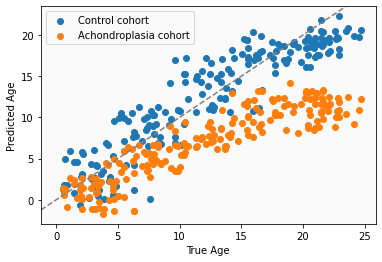

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

X_train = pd.DataFrame({'Height':df['control_height'].values, 
                        'Weight':df['control_weight'].values})
y_train = pd.Series(df['control_age'].values)

X_test = pd.DataFrame({'Height':df['achondroplasia_height'].values, 
                        'Weight':df['achondroplasia_weight'].values})
y_test = pd.Series(df['achondroplasia_age'].values)

model = LinearRegression()
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print(f'R2 train = {r2_score(y_train, y_train_predict)}')
print(f'R2 test = {r2_score(y_test, y_test_predict)}')
print(f'MAE train = {mean_absolute_error(y_train, y_train_predict)}')
print(f'MAE test = {mean_absolute_error(y_test, y_test_predict)}')

plt.scatter(y_train, y_train_predict, label='Control cohort')
plt.scatter(y_test, y_test_predict, label='Achondroplasia cohort')
plt.axline([0, 0], [20, 20], color='grey', ls='--')
plt.ylabel('Predicted Age')
plt.xlabel('True Age')
plt.legend()
plt.show()

/tmp/ipykernel_28052/823133829.py:18: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(im, label='Age, years', location='left')


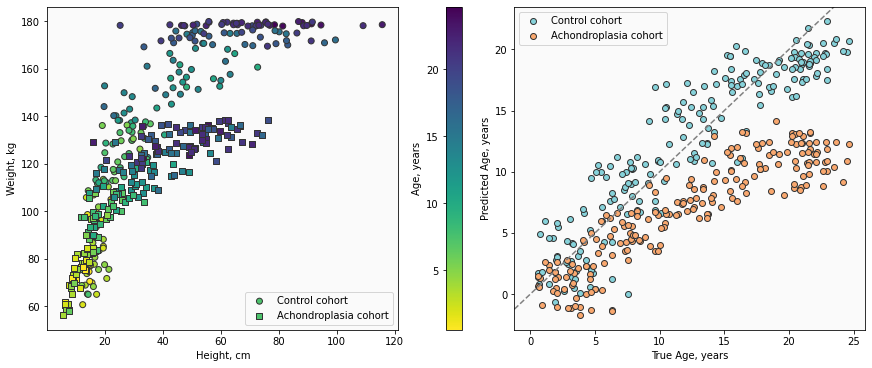

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
plt.rcParams['axes.facecolor'] = '#fafafa'

# 4 figure
fig = plt.figure(figsize=(12, 5), constrained_layout=True)
gs = GridSpec(1, 2, figure=fig)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

im = ax0.scatter(X_train['Weight'], X_train['Height'], c=y_train,
            edgecolors= "#333333", label='Control cohort', cmap='viridis_r')
ax0.scatter(X_test['Weight'], X_test['Height'], c=y_test, marker='s',
            edgecolors= "#333333", label='Achondroplasia cohort',
            cmap='viridis_r')
cbar = plt.colorbar(im, label='Age, years', location='left')
ax0.set_ylabel('Weight, kg')
ax0.set_xlabel('Height, cm')
ax0.legend()

# ax1 - 
ax1.scatter(y_train, y_train_predict, label='Control cohort', c='#86d2da', edgecolors= "#333333",)
ax1.scatter(y_test, y_test_predict, label='Achondroplasia cohort', c='#f9a86f', edgecolors= "#333333",)
ax1.axline([0, 0], [20, 20], color='grey', ls='--')
ax1.set_ylabel('Predicted Age, years')
ax1.set_xlabel('True Age, years')
ax1.legend()

plt.savefig('figs/achondroplasia_example.pdf', dpi=300, )
plt.show()

/tmp/ipykernel_28052/3087717481.py:19: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(im, label='Age, years', location='left')


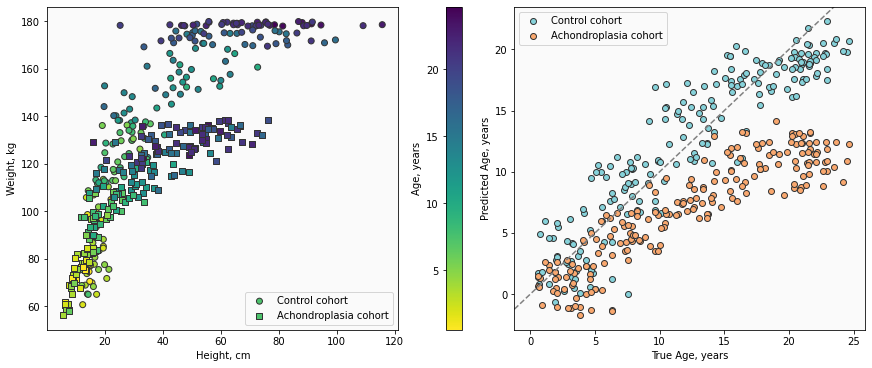

In [149]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
import seaborn as sns
plt.rcParams['axes.facecolor'] = '#fafafa'

# 4 figure
fig = plt.figure(figsize=(12, 5), constrained_layout=True)
gs = GridSpec(1, 2, figure=fig)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

im = ax0.scatter(X_train['Weight'], X_train['Height'], c=y_train,
            edgecolors= "#333333", label='Control cohort', cmap='viridis_r')
ax0.scatter(X_test['Weight'], X_test['Height'], c=y_test, marker='s',
            edgecolors= "#333333", label='Achondroplasia cohort',
            cmap='viridis_r')
cbar = plt.colorbar(im, label='Age, years', location='left')
ax0.set_ylabel('Weight, kg')
ax0.set_xlabel('Height, cm')
ax0.legend()

# ax1 - 
ax1.scatter(y_train, y_train_predict, label='Control cohort', c='#86d2da', edgecolors= "#333333",)
ax1.scatter(y_test, y_test_predict, label='Achondroplasia cohort', c='#f9a86f', edgecolors= "#333333",)
ax1.axline([0, 0], [20, 20], color='grey', ls='--')
ax1.set_ylabel('Predicted Age, years')
ax1.set_xlabel('True Age, years')
ax1.legend()

plt.savefig('figs/achondroplasia_example_AB.pdf', dpi=300, )
plt.show()

In [41]:
X_train['condition'] = 'Control cohort'
X_test['condition'] = 'Achondroplasia cohort'
X = pd.concat([X_train, X_test]).reset_index()

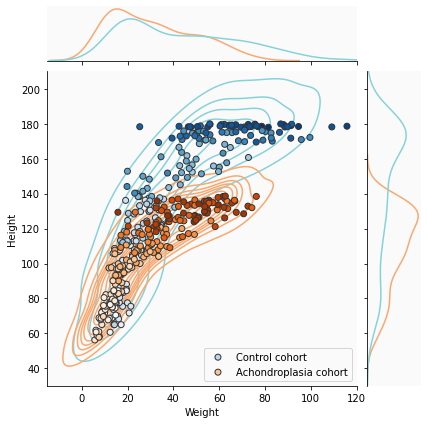

In [147]:
g = sns.jointplot(data=X, x='Weight', y='Height', 
                  kind='kde', 
                  hue='condition',
                  palette=['#86d2da', '#f9a86f']
                  )
g.ax_joint.scatter(X_train['Weight'], X_train['Height'], c=y_train, zorder=4, 
                   cmap='Blues', edgecolors= "#333333", label='Control cohort')
g.ax_joint.scatter(X_test['Weight'], X_test['Height'], c=y_test, zorder=4, 
                   cmap='Oranges', edgecolors= "#333333", label='Achondroplasia cohort')
g.ax_joint.legend(loc='lower right')

g.ax_joint.set_xlim([-15, 120])
g.ax_joint.set_ylim([30, 210])

plt.savefig('figs/achondroplasia_example_A.pdf', dpi=300, )
plt.show()

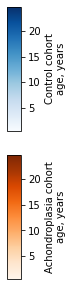

In [148]:
import matplotlib as mpl
fig, ax = plt.subplots(2, 1, figsize=(0.25, 5))

cb1 = mpl.colorbar.ColorbarBase(ax[0], cmap='Blues',
                                norm=plt.Normalize(vmin=y_train.min(), 
                                                   vmax=y_train.max()))
cb1.set_label('Control cohort\nage, years')
# Create a colorbar for the second cohort
cb2 = mpl.colorbar.ColorbarBase(ax[1], cmap='Oranges',
                                norm=plt.Normalize(vmin=y_test.min(), 
                                                   vmax=y_test.max()))
cb2.set_label('Achondroplasia cohort\nage, years')
plt.savefig('figs/achondroplasia_example_A_cbar.pdf', dpi=300, )
plt.show()

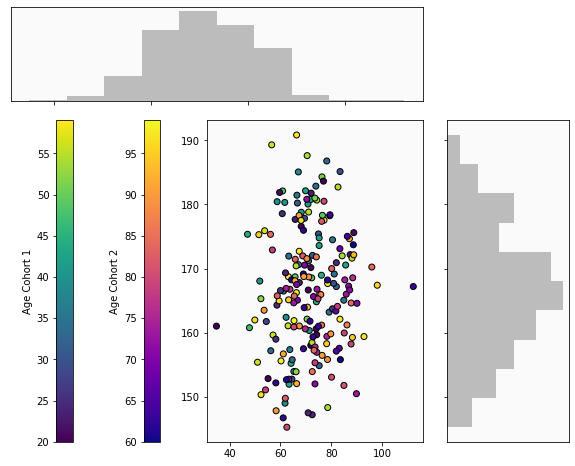

In [102]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Generate synthetic data for demonstration
np.random.seed(0)
data_size = 100
age_cohort1 = np.random.randint(20, 60, data_size)
age_cohort2 = np.random.randint(60, 100, data_size)
weight_cohort1 = np.random.normal(70, 10, data_size)
weight_cohort2 = np.random.normal(75, 12, data_size)
height_cohort1 = np.random.normal(170, 10, data_size)
height_cohort2 = np.random.normal(165, 8, data_size)

# Create DataFrame
df1 = pd.DataFrame({'Weight': weight_cohort1, 'Height': height_cohort1, 'Age': age_cohort1, 'Cohort': 'Cohort 1'})
df2 = pd.DataFrame({'Weight': weight_cohort2, 'Height': height_cohort2, 'Age': age_cohort2, 'Cohort': 'Cohort 2'})
df = pd.concat([df1, df2])

# Set up the matplotlib grid for the joint plot
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(4, 4)

ax_joint = fig.add_subplot(gs[1:4, 0:3])
ax_marg_x = fig.add_subplot(gs[0, 0:3], sharex=ax_joint)
ax_marg_y = fig.add_subplot(gs[1:4, 3], sharey=ax_joint)

# Scatter plot on joint axes
scatter1 = ax_joint.scatter(df1['Weight'], df1['Height'], c=df1['Age'], cmap='viridis', edgecolor='k')
scatter2 = ax_joint.scatter(df2['Weight'], df2['Height'], c=df2['Age'], cmap='plasma', edgecolor='k')

# Histograms on the marginals
ax_marg_x.hist(df['Weight'], color='gray', alpha=0.5)
ax_marg_y.hist(df['Height'], color='gray', alpha=0.5, orientation='horizontal')

# Colorbars
cbar1 = plt.colorbar(ScalarMappable(norm=Normalize(vmin=df1['Age'].min(), vmax=df1['Age'].max()), cmap='viridis'), ax=ax_joint, location='left', label='Age Cohort 1')
cbar2 = plt.colorbar(ScalarMappable(norm=Normalize(vmin=df2['Age'].min(), vmax=df2['Age'].max()), cmap='plasma'), ax=ax_joint, location='left', label='Age Cohort 2', pad=0.15)

# Adjustments
ax_marg_x.set_yticks([])
ax_marg_y.set_xticks([])
plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)

# Show the plot
plt.show()


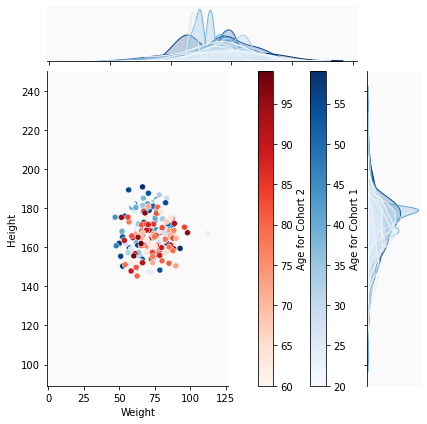

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Sample data
np.random.seed(0)
data_size = 100
age_cohort1 = np.random.randint(20, 60, data_size)
age_cohort2 = np.random.randint(60, 100, data_size)
weight_cohort1 = np.random.normal(70, 10, data_size)  # Average weight, cohort 1
weight_cohort2 = np.random.normal(75, 12, data_size)  # Average weight, cohort 2
height_cohort1 = np.random.normal(170, 10, data_size)  # Average height, cohort 1
height_cohort2 = np.random.normal(165, 8, data_size)   # Average height, cohort 2

# Creating DataFrame
df1 = pd.DataFrame({'Weight': weight_cohort1, 'Height': height_cohort1, 'Age': age_cohort1, 'Cohort': 'Cohort 1'})
df2 = pd.DataFrame({'Weight': weight_cohort2, 'Height': height_cohort2, 'Age': age_cohort2, 'Cohort': 'Cohort 2'})
df = pd.concat([df1, df2])

# Plot jointplot for the first cohort
g = sns.jointplot(data=df[df['Cohort'] == 'Cohort 1'], x='Weight', y='Height', hue='Age', palette='Blues', legend=False)

# Overlay the second cohort on the same plot
sns.scatterplot(data=df[df['Cohort'] == 'Cohort 2'], x='Weight', y='Height', hue='Age', palette='Reds', ax=g.ax_joint, legend=False)

# Create a colorbar for the first cohort
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=df[df['Cohort'] == 'Cohort 1']['Age'].min(), vmax=df[df['Cohort'] == 'Cohort 1']['Age'].max()))
sm.set_array([])
g.figure.colorbar(sm, ax=g.ax_joint, orientation='vertical', label='Age for Cohort 1')

# Create a colorbar for the second cohort
sm2 = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=df[df['Cohort'] == 'Cohort 2']['Age'].min(), vmax=df[df['Cohort'] == 'Cohort 2']['Age'].max()))
sm2.set_array([])
g.figure.colorbar(sm2, ax=g.ax_joint, orientation='vertical', label='Age for Cohort 2', pad=0.12)

plt.show()


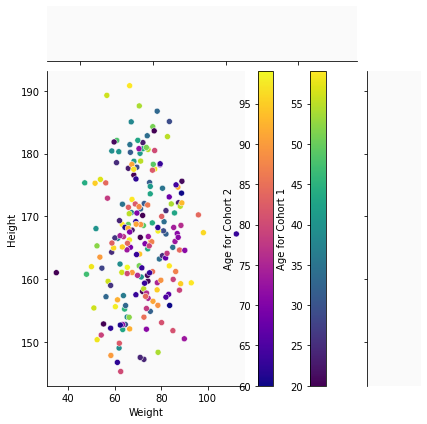

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Generate synthetic data
np.random.seed(0)
data_size = 100
age_cohort1 = np.random.randint(20, 60, data_size)
age_cohort2 = np.random.randint(60, 100, data_size)
weight_cohort1 = np.random.normal(70, 10, data_size)
weight_cohort2 = np.random.normal(75, 12, data_size)
height_cohort1 = np.random.normal(170, 10, data_size)
height_cohort2 = np.random.normal(165, 8, data_size)

# Create DataFrame
df1 = pd.DataFrame({'Weight': weight_cohort1, 'Height': height_cohort1, 'Age': age_cohort1, 'Cohort': 'Cohort 1'})
df2 = pd.DataFrame({'Weight': weight_cohort2, 'Height': height_cohort2, 'Age': age_cohort2, 'Cohort': 'Cohort 2'})
df = pd.concat([df1, df2])

# Initialize JointGrid
g = sns.JointGrid(x='Weight', y='Height', data=df)

# Plot scatter plots for both cohorts
sns.scatterplot(data=df[df['Cohort'] == 'Cohort 1'], x='Weight', y='Height', hue='Age', palette='viridis', legend=False, ax=g.ax_joint)
sns.scatterplot(data=df[df['Cohort'] == 'Cohort 2'], x='Weight', y='Height', hue='Age', palette='plasma', legend=False, ax=g.ax_joint)

# Create colorbar for the first cohort
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=df[df['Cohort'] == 'Cohort 1']['Age'].min(), vmax=df[df['Cohort'] == 'Cohort 1']['Age'].max()))
sm.set_array([])
cb1 = g.figure.colorbar(sm, ax=g.ax_joint, orientation='vertical', label='Age for Cohort 1')
cb1.ax.yaxis.set_label_position('left')
cb1.ax.yaxis.tick_left()

# Create colorbar for the second cohort
sm2 = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=df[df['Cohort'] == 'Cohort 2']['Age'].min(), vmax=df[df['Cohort'] == 'Cohort 2']['Age'].max()))
sm2.set_array([])
cb2 = g.figure.colorbar(sm2, ax=g.ax_joint, orientation='vertical', label='Age for Cohort 2')
cb2.ax.yaxis.set_ticks_position('left')
cb2.ax.yaxis.set_label_position('left')
cb2.ax.yaxis.tick_left()
cb2.ax.yaxis.set_offset_position('left')

plt.show()
